# Chapter 1: Data Acquisition
In this section, we connect to the raw Titanic dataset hosted on GitHub. To keep the project environment "light" and avoid local file management, we pull the data directly into memory using a public URL.

### Key Tools:
* **Pandas**: For data manipulation and analysis.
* **Seaborn/Matplotlib**: For statistical data visualization.

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We use the direct URL instead of a local file path
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Check the dimensions (Rows, Columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Look at the first 5 passengers
df.head()

Dataset contains 891 rows and 12 columns.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Multi-Angle Inspection
To build "Data Intuition," we don't just look at the top of the file. We use different Pandas methods to see the statistical distribution and ensure the data is consistent across the entire manifest.

* **Random Sampling**: Helps detect if the data is sorted or biased in the first few rows.

In [69]:
# View 5 random passengers to check for consistency
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S



* **Descriptive Statistics**: Provides a mathematical snapshot of the numerical ranges (min, max, mean).

In [70]:
# Statistical summary of numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



* **Categorical Inspection**: Reveals the diversity of non-numeric data, such as unique names or embarkation points.

In [71]:
# Summary of non-numeric (object) columns
df.describe(include=['O'])

C:\Users\samwa\AppData\Local\Temp\ipykernel_15324\950986363.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


### 1.2 Structural Verification
Before moving to deep analysis, we verify the "Structural Passport" of our dataset. This confirms the dimensions of our manifest and ensures that numerical data (like Age) and categorical data (like Sex) have been imported with the correct data types.

In [72]:
# The 'Passport' of our data: Shape and Types
print(f"Dataset Dimensions: {df.shape}")
print("-" * 30)
print(df.dtypes)

Dataset Dimensions: (891, 12)
------------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object


In [73]:
# Check the distribution of our Target Variable
df['Survived'].value_counts(normalize=True).round(3)

Survived
0    0.616
1    0.384
Name: proportion, dtype: float64

# Chapter 2: Data Integrity Check
Before performing any analysis, we must understand the "Vital Signs" of our dataset. We use `df.info()` to inspect the data types and, more importantly, to identify **Missing Values (Nulls)**.

### Observations to look for:
1. **Total Entries**: 891 passengers.
2. **Missing Ages**: The 'Age' column is incomplete and will require **Imputation** (filling in the gaps).
3. **Missing Cabin Info**: The 'Cabin' column is mostly empty and may need to be dropped.

In [74]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


> **Output Analysis & Imputation Strategy:** > 
> * **Age**: Initially, the 'Age' column had only 714 non-null values (~20% missing). We have resolved this by **Median Imputation**, ensuring our model has a complete dataset without the bias of extreme age outliers.
> 
> * **Embarked**: With only 2 values missing, we used **Mode Imputation** (filling with 'S'), as it is the most statistically likely port of origin.
> 
> * **Cabin**: This feature was missing over **77%** of its data. Rather than guessing cabin numbers, we transformed this into a binary feature **'HasCabin'**. This captures the potential survival advantage of having an assigned room versus being in general steerage, while effectively "neutralizing" the missing data problem.

In [75]:
# Calculate exact missing values per column
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

# Combine into a clean table
null_report = pd.concat([missing_data, missing_percentage], axis=1, keys=['Total Nulls', 'Percentage (%)'])
null_report

,Total Nulls,Percentage (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


# Chapter 3: Exploratory Data Analysis (EDA)
In this phase, we look for visual evidence of "Survival Drivers." We want to see which features (like Gender or Social Class) have the strongest correlation with survival. 

### Why Visualize?
Machine Learning models are only as good as the patterns we provide. By plotting these relationships, we can confirm our intuition before building the model.

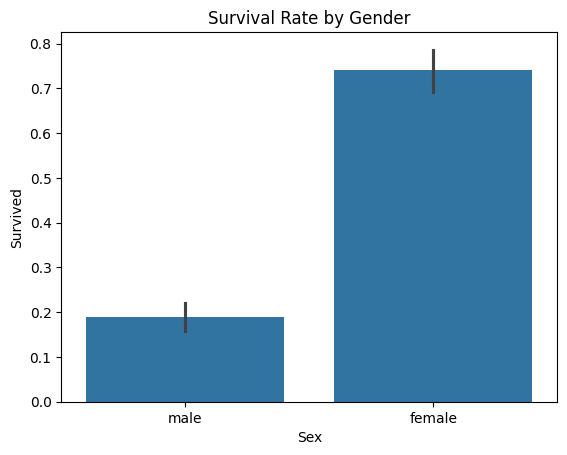

In [76]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')

plt.show()

### Survival Analysis by Age Group (Binning)

To better understand the relationship between age and survival, we have "binned" the continuous Age data into discrete life stages: Child, Teen, Young Adult, Adult, and Senior.

By grouping ages, we can more clearly observe the "Women and Children First" protocol in action.

**Why we use Binning here:**

*   **Noise Reduction:** Individual ages (like 21 vs. 22) often have no statistical difference in survival. Binning smooths out this "noise."
*   **Pattern Recognition:** It becomes immediately obvious if infants or the elderly were prioritized during the evacuation.
*   **Gap Management:** This view helps us see how our "Imputed" (filled-in) ages fit into the broader distribution of the passenger manifest.


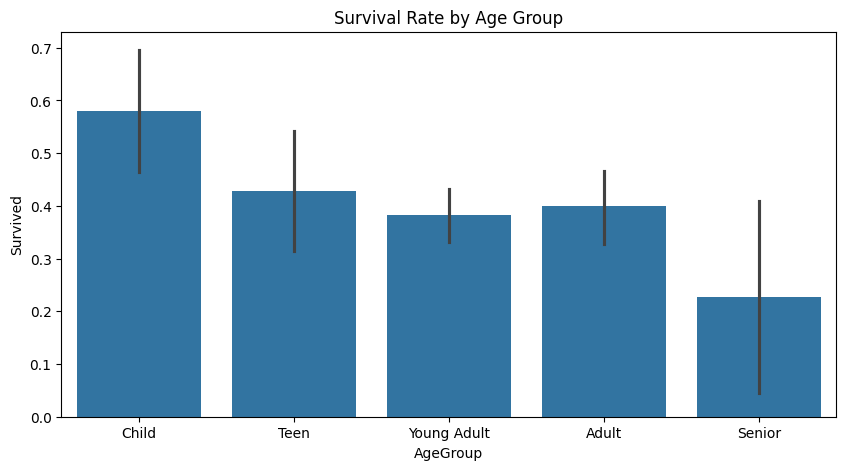

In [77]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], 
                        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


### Handling Missing Data (Imputation & Feature Engineering)

Upon inspection, we identified three columns with missing values. Our strategy for each is tailored to the amount of data missing and the nature of the feature:

*   **Age (177 missing values ~20%):** We perform Median Imputation.
    *   **Why Median?:** The age distribution is slightly skewed; the median provides a more robust "middle" value than the mean (average), which can be pulled by outliers.

*   **Embarked (2 missing values):** We use Mode Imputation (filling with 'S').
    *   **Why Mode?:** Since this is categorical data with very few missing entries, we fill the "holes" with the most frequent port of embarkation (Southampton).

*   **Cabin (687 missing values ~77%):** Due to the massive amount of missing data, standard imputation would be inaccurate. Instead, we use Feature Engineering to create a new binary feature: `HasCabin`.
    *   **Why binary?:** We assume that simply having a recorded cabin number might be a proxy for higher social status and better survival odds. We assign `1` if a cabin is listed and `0` if it is missing.


In [78]:
# 1. Fill missing Age values
df['Age'] = df['Age'].fillna(df['Age'].median())

# 2. Fill missing Embarked values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Handle the Cabin column
# We create a 'HasCabin' feature: 1 if they had a cabin, 0 if it's missing (NaN)
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Verify the "Holes" are gone in our target columns
print("Missing values after filling:")
print(df[['Age', 'Embarked', 'HasCabin']].isnull().sum())

Missing values after filling:
Age         0
Embarked    0
HasCabin    0
dtype: int64


### The Correlation Landscape

Before we start building models, we need to understand the relationships between our variables. We use a Correlation Matrix to measure the linear relationship between features, ranging from -1 (perfect inverse relationship) to +1 (perfect direct relationship).

**Why do we do this?**

*   **Identify Drivers:** We can see which features (like `Fare` or `Pclass`) have the strongest connection to the `Survived` target.
*   **Detect Redundancy:** If two features are almost identical (e.g., `SibSp` and `FamilySize`), we might decide to drop one to simplify the model.


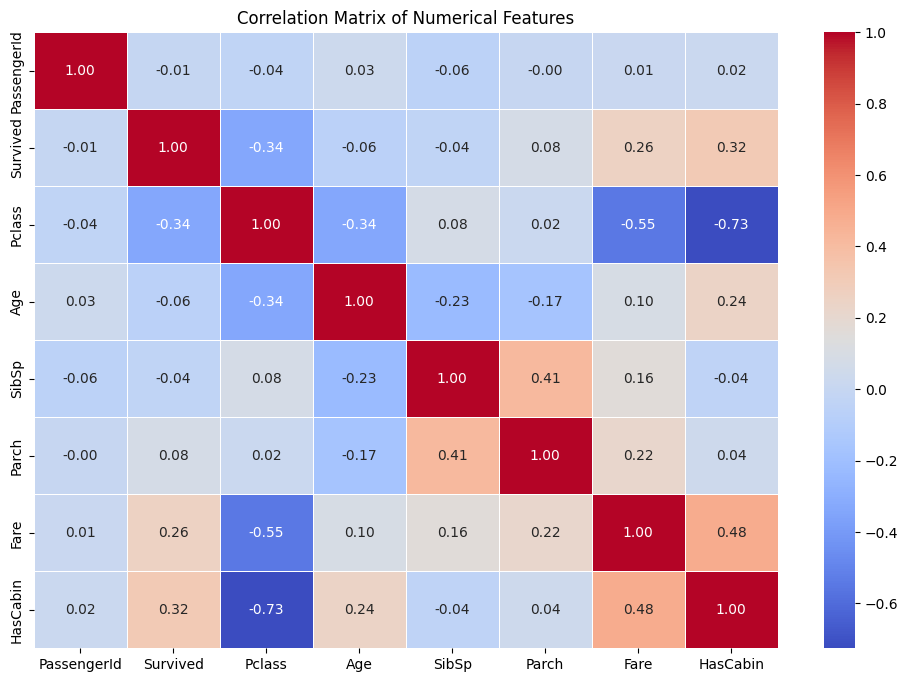

In [79]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Output Analysis: Key Insights from the Heatmap

*   **Social Class (`Pclass`) Impact:** There is a significant negative correlation (-0.34) between `Pclass` and `Survived`. This mathematically confirms that as the class number increases (1st → 3rd), the statistical chance of survival drops.

*   **Economic Advantage (`Fare`):** `Fare` shows a positive correlation (0.26) with `Survived`, suggesting that those who paid more for their tickets generally had better access to lifeboats and higher-priority evacuation.

*   **The `Pclass`-`Fare` Paradox:** We notice a strong negative correlation (-0.55) between `Pclass` and `Fare`. This is a logical validation of our data: as the Class number moves from 3rd to 1st, the ticket price increases significantly.

*   **The Family Connection:** `SibSp` (siblings/spouses) and `Parch` (parents/children) show a moderate correlation of 0.41. This link justifies our strategy to combine them into a single `FamilySize` feature later to simplify the model.

*   **Identifying "Noise":** The `PassengerId` column shows near-zero correlation (-0.01) with survival, confirming it is a random identifier that should be dropped to prevent Overfitting.

> **Why this matters for our Model:**
>
> *   By identifying these correlations, we know that `Pclass`, `Fare`, and Gender (which we will encode next) will likely be our most important features. We also see that `Age` (at -0.08) has a weaker linear correlation, which is why we previously used Binning to capture its non-linear survival patterns (like "Children First").


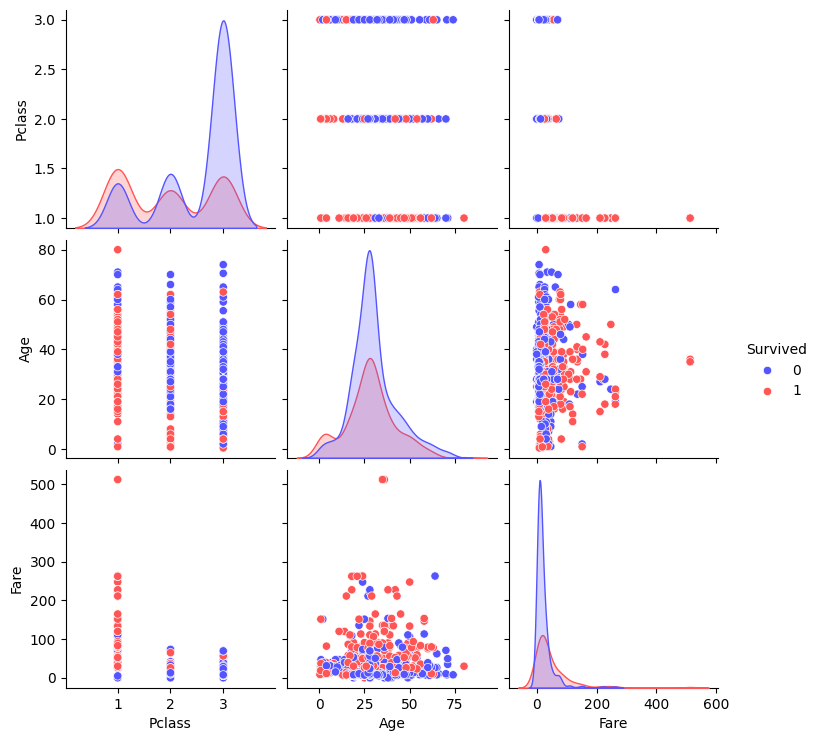

In [80]:
# A pairplot allows us to see distributions and scatter relations at once
# We use 'hue' to color the points by survival status
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='seismic')
plt.show()

### Output Analysis: Key Insights from the Distributions

*   **Age Density (Center Diagonal):** If you look at the middle diagonal plot for `Age`, you can see a distinct "hump" in the red distribution (Survivors) on the far left. This mathematically captures the "Children First" protocol, showing a higher density of survivors among infants and young children.

*   **Fare Outliers (Bottom-Right):** The scatter plots involving `Fare` show a few extreme data points at the $500 mark. Notice that all of these points are red—indicating that every passenger who paid the highest possible fare survived.

*   **Pclass Separation (Top-Left):** The "humps" for `Pclass` show that for Class 3 (the largest peak), the blue area (Non-survivors) significantly outweighs the red area. Conversely, for Class 1, the red and blue areas are much closer in size, confirming higher survival rates for the upper class.

*   **Linearity vs. Complexity:** The scatter plots show that the relationships aren't perfectly linear (the dots aren't in a straight line). This tells us that a simple model might struggle, and we may benefit from more complex algorithms later in the project.

> **Why this matters for our Model:** Seeing the overlap between the red and blue distributions helps us understand which features are "separable." The more separated the colors are in a specific plot, the easier it will be for our AI model to draw a "decision boundary" and make accurate predictions.


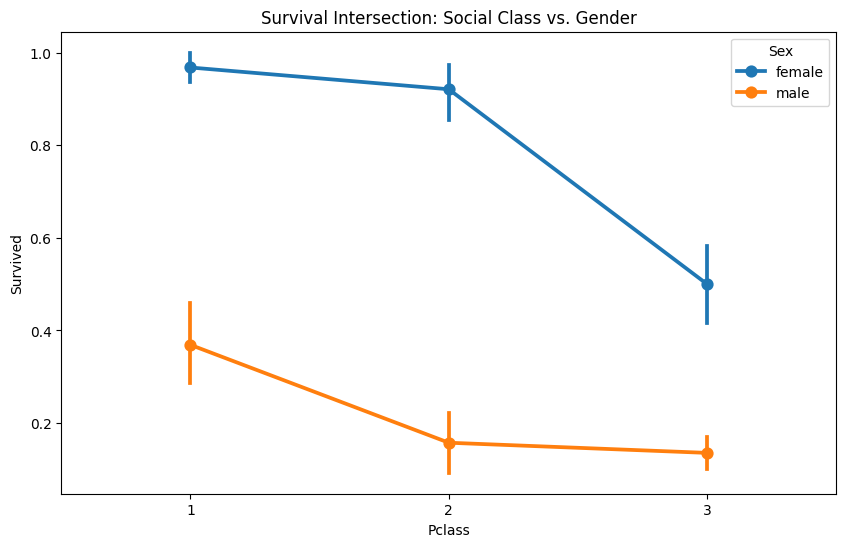

In [81]:
# Visualizing the intersection of Social Class and Gender
plt.figure(figsize=(10, 6))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Intersection: Social Class vs. Gender')
plt.show()

#### Output Analysis: The Survival Intersection

This visualization reveals the most critical decision-making pattern of the 1912 disaster:

*   **The Gender Priority:** Across all classes, females had a significantly higher probability of survival than males. In 1st and 2nd class, female survival was near 90%, whereas 1st-class males were below 40%.

*   **The Class Penalty:** Survival rates drop for both genders as we move toward 3rd class. However, the drop for females is more dramatic, falling from nearly certain survival in 1st/2nd class to roughly 50% in 3rd class.

*   **The Gender vs. Wealth Trade-off:** Interestingly, a 3rd-class female had a higher statistical chance of survival than a 1st-class male. This proves that while wealth was a powerful shield, gender was the primary "driver" for lifeboat access.


## Chapter 4: Categorical Encoding

Machine Learning algorithms are built on linear algebra and calculus; they require numerical input to function. Currently, features like `Sex` and `Embarked` are stored as text (strings).


### Binary Label Encoding

Binary Encoding (or Label Mapping) is the simplest form of transformation, used specifically for features that have exactly two categories. We map these text labels to a simple 0 and 1 format.

*   **Target Feature:** Sex (Male / Female).
*   **Why?:** Machine learning models require numerical input. Since Sex only has two possible states, a single binary column is the most memory-efficient way to represent this information without adding unnecessary complexity to the dataset.
*   **The Logic:** We typically assign 0 to the majority or "base" class and 1 to the other. In this dataset, we map male to 0 and `female` to 1.





In [82]:
# 1. Binary Label Encoding (Sex)
# Simple 0/1 mapping for a two-category feature
df['Sex_binary'] = df['Sex'].map({'male': 0, 'female': 1})

> **Implementation Insight:**
>
> By using a simple dictionary map, we transform the `Sex` column into `Sex_binary`. This allows the model to treat gender as a "toggle" switch, which is mathematically ideal for algorithms like Logistic Regression.

### Ordinal Encoding (Ranked Data)

Ordinal Encoding is used for features where the categories have a natural, inherent order or rank. Unlike nominal data (like port of embarkation), these values carry a mathematical meaning in their sequence.

*   **Target Feature:** `Pclass` (1st, 2nd, and 3rd Class).
*   **The Logic:** In the Titanic dataset, Ticket Class is a proxy for socio-economic status. 1st Class is "higher" than 2nd Class, which is "higher" than 3rd Class.
*   **The Strategy:** Since the dataset already provides these as 1, 2, and 3, we often preserve this numerical structure. This allows the model to understand that a change from 1st to 3rd class represents a "step down" in a specific direction.
*   **Refinement:** Some practitioners flip these values (3rd=1, 2nd=2, 1st=3) so that the "highest" status has the "highest" number, which can be more intuitive for certain linear models to interpret as a positive correlation with survival.



In [83]:
# 3. Categorical Conversion (Pclass)
# Telling Pandas to treat this as a group rather than a simple integer
df['Pclass'] = df['Pclass'].astype('category')


>   **Implementation Note:** We have converted `Pclass` to a `Categorical` data type. This tells Pandas to treat the numbers as labels for groups, ensuring our visualizations (like boxplots) correctly handle them as discrete ranks rather than a continuous sliding scale.

### Categorical Encoding: One-Hot Encoding
The 'Embarked' column contains non-numeric data representing the port of departure. Since there is no inherent "rank" between these ports, we use **One-Hot Encoding**. This creates a new binary column (0 or 1) for each unique port, ensuring the model treats them as distinct categories without a mathematical hierarchy.

In [84]:
# Using Pandas' get_dummies to create the 0/1 columns
embarked_dummy = pd.get_dummies(df['Embarked'], prefix='Port')

# Combining the new dummy columns with the original DataFrame
df = pd.concat([df, embarked_dummy], axis=1)

# Looking at the new columns at the front of the DataFrame
df.filter(like='Port').head()

,Port_C,Port_Q,Port_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


## Binary Feature Engineering (Indicator Variables)

Binary Feature Engineering involves creating "flags" or indicator variables (0 or 1) from existing complex or messy data. This is particularly useful for handling columns with high amounts of missing values or for highlighting specific conditions that we believe impact survival.

*   **Target Features:** `Cabin` (transformed into `HasCabin`) and `FamilySize` (transformed into `IsAlone`).
*   **The Problem (Cabin):** The `Cabin` column is missing over 77% of its data. Conventional imputation would be highly inaccurate.
*   **The Strategy (HasCabin):** Instead of dropping the column or guessing cabin numbers, we create a binary feature where 1 indicates a cabin was recorded and 0 indicates it was missing. This acts as a proxy for social status and proximity to the upper decks.
*   **The Strategy (IsAlone):** While `FamilySize` tells us the count of relatives, being entirely alone (`FamilySize` = 1) is a distinct social state. We create a binary flag where 1 means the passenger traveled solo and 0 means they had family aboard.


In [85]:
# 4. Binary Feature Engineering (HasCabin)
# We already identified this strategy in Chapter 2
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

>*   **Implementation Insight:** This technique is a form of "Dimensionality Reduction" that preserves the most important signal (Presence vs. Absence) while removing the noise of specific, missing, or redundant details.


### Binary Indicator Variables (Feature Engineering)

In this section, we create Indicator Variables (also known as "Boolean Flags"). This technique simplifies complex data into a binary 0 or 1 state to highlight a specific condition that influenced survival.

*   **IsAlone:** While `FamilySize` provides a count, being entirely solo often meant a different survival priority or lack of a social safety net. We create this binary indicator to capture the specific "Solo Traveler" status.
*   **HasCabin:** Due to the high volume of missing data in the `Cabin` column (77%), we cannot use the room numbers. Instead, we engineer an indicator variable where 1 means a cabin was recorded and 0 means it was missing, serving as a proxy for social status.


In [86]:
# Feature Engineering 'IsAlone' Indicator
# First, calculate total family size (Siblings + Parents + Self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Then, create the binary flag: 1 if alone, 0 if with family
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [87]:
# Preview the results
print("--- Transformation Preview ---")
cols_to_view = ['Sex', 'Sex_binary', 'Embarked', 'Port_S', 'Port_C', 'Port_Q', 'Pclass', 'HasCabin']
df[cols_to_view].head()

--- Transformation Preview ---


,Sex,Sex_binary,Embarked,Port_S,Port_C,Port_Q,Pclass,HasCabin
0,male,0,S,True,False,False,3,0
1,female,1,C,False,True,False,1,1
2,female,1,S,True,False,False,3,0
3,female,1,S,True,False,False,1,1
4,male,0,S,True,False,False,3,0


### Feature Scaling (Standardization)
Machine Learning algorithms like Logistic Regression and Support Vector Machines are sensitive to the scale of the input data. Currently, 'Fare' has a much wider range than 'Age'. 

We use **Standardization** to transform these features so they have a mean of 0 and a standard deviation of 1. This ensures that the model treats all features with equal importance during the optimization process.

In [88]:
# Create FamilySize feature by combining SibSp(siblings/spouses) and Parch(parents/children)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [89]:
from sklearn.preprocessing import StandardScaler

# initialize the scaler
scaler = StandardScaler()

# columns with different scales to be standardized
cols_to_scale = ['Age', 'Fare', 'FamilySize']

# fit and transform the data it will standardize the selected columns by removing the mean and scaling to unit variance
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# display the first 5 rows of the standardized columns
df[cols_to_scale].head()

,Age,Fare,FamilySize
0,-0.565736,-0.502445,0.059160
1,0.663861,0.786845,0.059160
2,-0.258337,-0.488854,-0.560975
3,0.433312,0.420730,0.059160
4,0.433312,-0.486337,-0.560975


In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 1. Initialize the three scalers
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()

# 2. Apply them to the 'Fare' column
# We use .values.reshape(-1, 1) because scalers expect a 2D array
fare_data = df[['Fare']]

df['Fare_Standard'] = std_scaler.fit_transform(fare_data)
df['Fare_MinMax'] = mm_scaler.fit_transform(fare_data)
df['Fare_Robust'] = rb_scaler.fit_transform(fare_data)

# 3. Compare the stats
comparison = df[['Fare', 'Fare_Standard', 'Fare_MinMax', 'Fare_Robust']].describe().round(3)
print(comparison)

          Fare  Fare_Standard  Fare_MinMax  Fare_Robust
count  891.000        891.000      891.000      891.000
mean     0.000          0.000        0.063        0.769
std      1.001          1.001        0.097        2.152
min     -0.648         -0.648        0.000       -0.626
25%     -0.489         -0.489        0.015       -0.283
50%     -0.357         -0.357        0.028        0.000
75%     -0.024         -0.024        0.061        0.717
max      9.667          9.667        1.000       21.563


To ensure our model treats all numerical features (Age, Fare, FamilySize) fairly, we must scale them. While we used **StandardScaler** for its general-purpose reliability, we also considered:

* **StandardScaler**: Centers data around a mean of 0. We chose this for our final model as it is the standard for Logistic Regression.
* **MinMaxScaler**: Ideal for squashing data into a 0 to 1 range, though sensitive to outliers.
* **RobustScaler**: Best for data with extreme outliers, as it uses the Median instead of the Mean.

#### The "Golden Rule" of Scaling: Fit vs. Transform
To prevent **Data Leakage** (the model accidentally "cheating" by seeing future data trends), we follow a strict sequence:

1.  **`.fit()`**: The scaler "learns" the parameters (like Mean and Std) from the **Training Data** only.
2.  **`.transform()`**: The scaler applies those learned parameters to any data (Training, Testing, or New).
3.  **`.fit_transform()`**: A convenience method used **only** on the initial training set to learn and apply in one step.

> **Note:** We never `fit` on our Test data. We want the model to treat the Test data as "the unknown future," using only what it learned from the past (the Training set).

## Final Feature Refinement
To maximize model performance, we perform two final preprocessing steps:

1. **Feature Engineering (IsAlone)**: We create a binary feature to distinguish between solo travelers and those with family, as this often correlates with survival priority.
2. **Dimensionality Reduction**: We drop "Noise" columns like `Name`, `Ticket`, and `PassengerId`. These features contain high cardinality or random data that could lead to **Overfitting** (the model memorizing names instead of learning patterns).

In [91]:
# Select the final columns while REMOVING duplicate names
final_features = [
    'Survived',    # Target (The "Answer")
    'Pclass',      # Social Status (1, 2, 3)
    'Sex_binary',  # Gender (0 or 1)
    'Age',         # Standardized Age
    'Fare',        # Standardized Fare
    'FamilySize',  # Standardized Family Size
    'IsAlone',     # Binary: Was the passenger solo?
    'HasCabin',    # Binary: Was a cabin recorded? (status proxy)
    'Port_S',      # Boarded at Southampton
    'Port_C'       # Boarded at Cherbourg
    # Note: We dropped Port_Q to avoid the Dummy Variable Trap!
]

# This line removes any duplicate columns that might have sneaked in
df_final = df.loc[:, ~df.columns.duplicated()].copy()
df_final = df_final[final_features]

# 4. Final Verification
print("--- Final Model-Ready Dataset ---")
print(df_final.isnull().sum())
print(f"\nShape: {df_final.shape}") # Should be (891, 11)
df_final.head()

--- Final Model-Ready Dataset ---
Survived      0
Pclass        0
Sex_binary    0
Age           0
Fare          0
FamilySize    0
IsAlone       0
HasCabin      0
Port_S        0
Port_C        0
dtype: int64

Shape: (891, 10)


,Survived,Pclass,Sex_binary,Age,Fare,FamilySize,IsAlone,HasCabin,Port_S,Port_C
0,0,3,0,-0.565736,-0.502445,0.059160,0,0,True,False
1,1,1,1,0.663861,0.786845,0.059160,0,1,False,True
2,1,3,1,-0.258337,-0.488854,-0.560975,1,0,True,False
3,1,1,1,0.433312,0.420730,0.059160,0,1,True,False
4,0,3,0,0.433312,-0.486337,-0.560975,1,0,True,False


In [92]:
# Export the clean data for our Modeling Notebook
df_final.to_csv('titanic_model_ready.csv', index=False)
print("Data saved! Ready for the next notebook.")

Data saved! Ready for the next notebook.
